In [24]:

"""
RQ2: how is the bias mitigation????

lol literally outperforms everything in all metrics with some small exceptions
outperforms everything for every example for aspd, spd, di, sf


For Adult sex:
horrible predictive performance but 10x better bias than the best debias...... actually not a usable example
For Adult race:
NOTE: for some models the performance loss seems better than others!!!
--- not as different in performance. still bad tho.
- bias much better  than all others for aspd, spd, di, sf
- FM and RW slightly better AEOD (sliiightly)

add a rq abt diff ml models and use:
nn, DT, RF, SVM, NB, LGR
maybe find a reason to remote dt and just 

TODO: checkout results with just nn
"""

'\nRQ2: how is the bias mitigation????\n\nlol literally outperforms everything in all metrics with some small exceptions\noutperforms everything for every example for aspd, spd, di, sf\n\n\nFor Adult sex:\nhorrible predictive performance but 10x better bias than the best debias...... actually not a usable example\nFor Adult race:\nNOTE: for some models the performance loss seems better than others!!!\n--- not as different in performance. still bad tho.\n- bias much better  than all others for aspd, spd, di, sf\n- FM and RW slightly better AEOD (sliiightly)\n\nadd a rq abt diff ml models and use:\nnn, DT, RF, SVM, NB, LGR\nmaybe find a reason to remote dt and just \n\nTODO: checkout results with just nn\n'

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *



pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


# SAVE TO RESULTS FILE

In [21]:
FOLDER = "RQ2_BIAS_MIT"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

In [22]:
def f(df, reader): # Keep only K and KP
    df = df[(df["ML method"].str.contains('nn'))]
    df['TEMP'] = df['other'].apply(reader._get_losses_used)
    df = df[(~df["bias mitigation"].str.contains('FYP VAE')) | df["TEMP"].str.contains('Sensitive KL loss') ]
    df = df[~(df["TEMP"].str.contains("Flipped"))]
    df = df[~(df["TEMP"].str.contains("Latent"))]
    return df.drop(columns=['TEMP'])

### MEAN metric vals for NN 

In [23]:

for attr in [["sex"],["race"]]:            
    default_files = [os.path.join("results","MAIN_defualt_"+'_'.join(attr)+".csv") , os.path.join("results","defualt_"+'_'.join(attr)+".csv")] # TODO: REMOVE
    files = default_files + [os.path.join("results","RESULTS_"+'_'.join(attr)+".csv")]
    reader = ResultsReader(files)
        
    df = reader.get_mean_metrics()
    model_df = f(df, reader)
    mean_df = model_df.groupby(reader.filterable).mean().reset_index()
    mean_df.to_csv(os.path.join(FOLDER, "MEAN_"+'_'.join(attr)+'.csv'), index=False)



File 'results\MAIN_defualt_sex.csv' successfully loaded as DataFrame.
File 'results\defualt_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
Error: Unable to open 'results\MAIN_defualt_race.csv' [Errno 2] No such file or directory: 'results\\MAIN_defualt_race.csv'
Error: Unable to open 'results\defualt_race.csv' [Errno 2] No such file or directory: 'results\\defualt_race.csv'
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.


In [18]:
FOLDER = "RQ3_MULTIATTR"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

In [19]:
for attr in [["race", "sex"]]:            
    files =  [os.path.join("results","RESULTS_"+'_'.join(attr)+".csv")]
    reader = ResultsReader(files)
        
    df = reader.get_mean_metrics()
    
    model_df =f(df, reader)
    mean_df = model_df.groupby(reader.filterable).mean().reset_index()
    mean_df.to_csv(os.path.join(FOLDER, "MEAN_"+'_'.join(attr)+'.csv'), index=False)        


File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.


# VIS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [2]:
size = 3.3

In [7]:
def f(df, reader): # Keep only K and KP
    df = df[(df["ML method"].str.contains('nn'))]
    df['TEMP'] = df['other'].apply(reader._get_losses_used)
    #df = df[(~df["bias mitigation"].str.contains('FYP VAE'))  | df["TEMP"].str.contains('Sensitive KL loss') ]
    df = df[~(df["TEMP"].str.contains("Pos")) | df["TEMP"].str.contains('Sensitive KL loss') ]
    df = df[~(df["TEMP"].str.contains("Recon")) | df["TEMP"].str.contains('Sensitive KL loss') ]
    df = df[~(df["TEMP"].str.contains("Flipped"))]
    df = df[~(df["TEMP"].str.contains("Latent"))]
    return df.drop(columns=['TEMP'])

In [8]:
files, datasets, titles = get_all_single_attr_files(True)

File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[SF] 

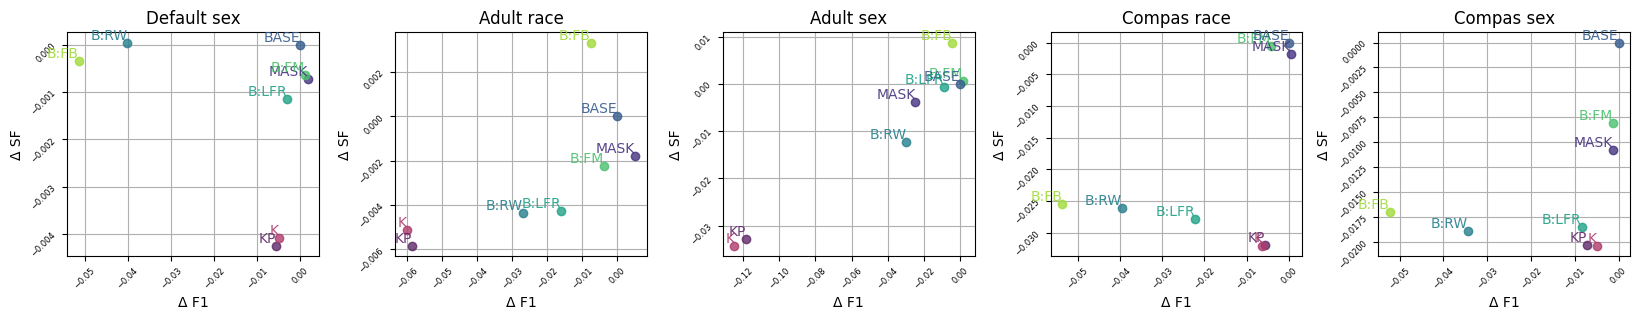

In [9]:
# NN
F, axes = plt.subplots(1, 5, figsize=(size*(5), size))


for i in range(5):
    plot_one_run(f, files[i], datasets[i], axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel("Δ SF") # comment out to make sure 
    axes[i].set_xlabel("Δ F1")
    
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('imgs/RQ2_singleattr_F1_SF.png')
plt.show()

File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[A_EOD] Absolute Equal Opportunity Difference'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: ['race|[A_EOD] Absolute Equal Opportunity Difference'] ['f1score']
File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[A_EOD] Absolute Equal Opportunity Difference'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: ['race|[A_EOD] Absolute Equal Opportunity Difference'] ['f1score']
File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[A_EOD] Absolute Equal Opportunity Difference'] ['f1score']


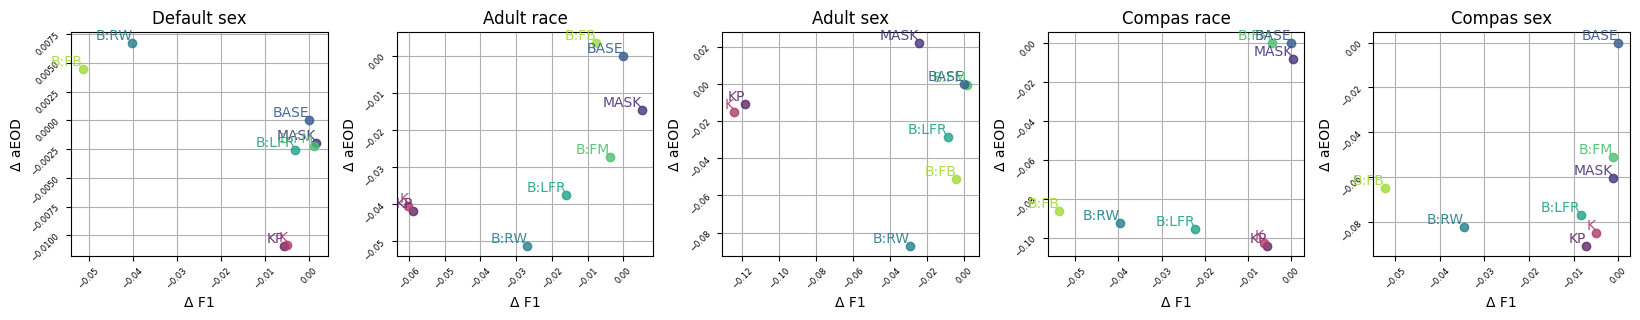

In [10]:
F, axes = plt.subplots(1, 5, figsize=(size*(5), size))


for i in range(5):
    plot_one_run(f, files[i], datasets[i], axes[i], "A_EOD")
    axes[i].set_title(titles[i])
    axes[i].set_ylabel("Δ aEOD") # comment out to make sure 
    axes[i].set_xlabel("Δ F1")
    
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('imgs/RQ2_singleattr_F1_EOD.png')

plt.show()

In [4]:
multi_files, multi_datasets, multi_titles = get_all_multi_attr_files()

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] f1score
File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] f1score


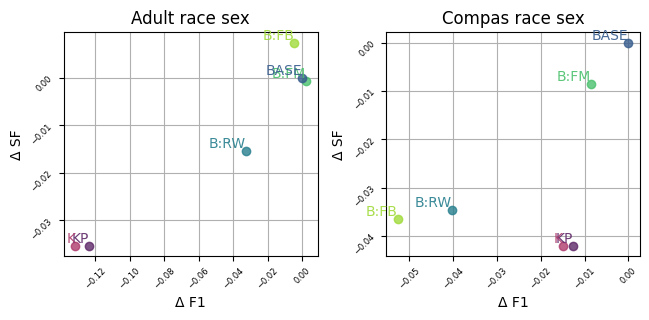

In [11]:
F, axes = plt.subplots(1, 2, figsize=(size*(2), size))


for i in range(2):
    plot_one_run(f, multi_files[i], multi_datasets[i], axes[i])
    axes[i].set_title(multi_titles[i])
    axes[i].set_ylabel("Δ SF") # comment out to make sure 
    axes[i].set_xlabel("Δ F1")
    
    
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('imgs/RQ3_multiattr_F1_SF.png')

plt.show()

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[DI_FM] Disparate Impact the way it was implemented in FairMask'] ['race|[DI_FM] Disparate Impact the way it was implemented in FairMask']
File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[DI_FM] Disparate Impact the way it was implemented in FairMask'] ['race|[DI_FM] Disparate Impact the way it was implemented in FairMask']


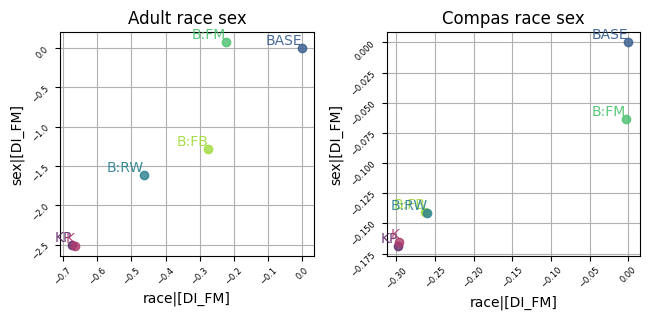

In [7]:


F, axes = plt.subplots(1, 2, figsize=(size*(2), size))


for i in range(2):
    plot_one_run(f, multi_files[i], multi_datasets[i], axes[i], y_metric="sex|[DI_FM]", x_metric='race|[DI_FM]')
    axes[i].set_title(multi_titles[i])
    #axes[i].set_ylabel("Δ SF") # comment out to make sure 
    #axes[i].set_xlabel("Δ F1")
    

    
    
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('imgs/RQ3_multiattr_F1_SF.png')

plt.show()

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: ['race|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness'] ['f1score']
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness'] ['f1score']
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: ['race|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness'] ['f1score']
File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness'] ['f1score']
File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['race|[DF] Differential Fairness for One Attribute'] ['f1score']
File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['race|[DF] Differential Fairn

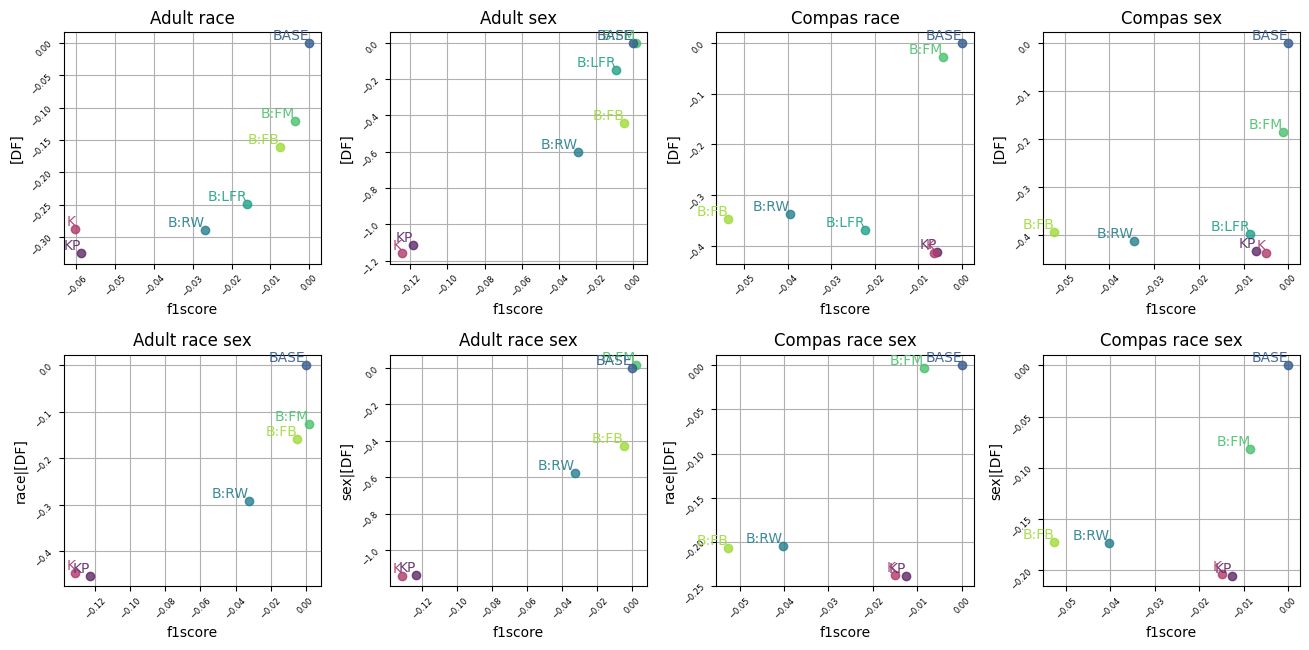

In [21]:
F, axes = plt.subplots(2, 4, figsize=(size*(4), size*2))


for i in range(1,5):
    plot_one_run(f, files[i], datasets[i], axes[0][i-1], "[DF]")
    axes[0][i-1].set_title(titles[i])
    #axes[i-1].set_ylabel("Δ DF") # comment out to make sure 
    #axes[i-1].set_xlabel("Δ F1")
    



for i in range(2):
    plot_one_run(f, multi_files[i], multi_datasets[i], axes[1][i*2], y_metric="race|[DF]")
    axes[1][i*2].set_title(multi_titles[i])
    #axes[i].set_ylabel("Δ SF") # comment out to make sure 
    #axes[i].set_xlabel("Δ F1")
    
    
for i in range(2):
    plot_one_run(f, multi_files[i], multi_datasets[i], axes[1][i*2+1], y_metric="sex|[DF]")
    axes[1][i*2+1].set_title(multi_titles[i])
    #axes[i].set_ylabel("Δ SF") # comment out to make sure 
    #axes[i].set_xlabel("Δ F1")
    
    
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('imgs/RQ3_multiattr_DF.png')

plt.show()

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[A_SPD] Absolute Statistical Parity Difference'] ['race|[A_SPD] Absolute Statistical Parity Difference']


File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[A_SPD] Absolute Statistical Parity Difference'] ['race|[A_SPD] Absolute Statistical Parity Difference']


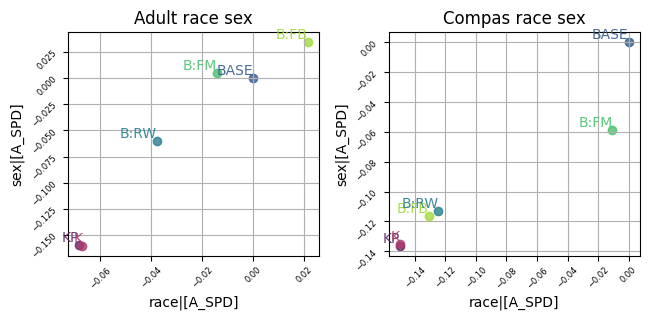

In [5]:


F, axes = plt.subplots(1, 2, figsize=(size*(2), size))


for i in range(2):
    plot_one_run(f, multi_files[i], multi_datasets[i], axes[i], y_metric="sex|[A_SPD]", x_metric='race|[A_SPD]')
    axes[i].set_title(multi_titles[i])
    #axes[i].set_ylabel("Δ SF") # comment out to make sure 
    #axes[i].set_xlabel("Δ F1")
    
    
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('imgs/RQ3_multiattr_F1_SF.png')

plt.show()

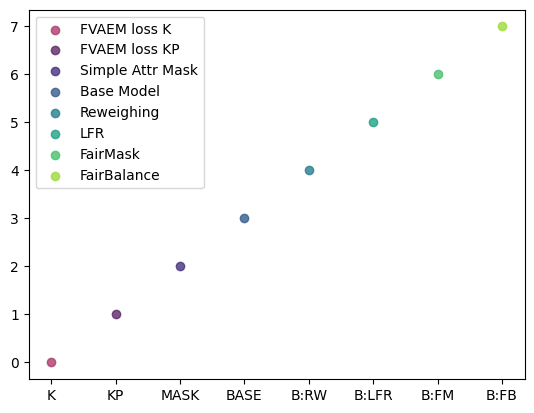

In [13]:
# LEGEND!
grapher = ResultsGrapher(None)
labels  = ["K","KP","MASK",'BASE',"B:RW","B:LFR","B:FM","B:FB"]
for i, l in enumerate(labels):
    plt.scatter(
            l,
            i,
            label=grapher._get_legend_text(l, l),
            color=grapher.get_color(l),
            alpha=0.8,
        )
plt.legend()
plt.show()

# CHECK OUT ALL COMBOS

File 'results\MAIN_defualt_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] f1score
metrics to display: ['sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the positive label'] f1score
metrics to display: ['sex|[DI] Disparate Impact', 'sex|[DI_FM] Disparate Impact the way it was implemented in FairMask'] f1score
metrics to display: ['sex|[ERD] Error Rate Difference'] f1score
metrics to display: ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] MCC
metrics to display: ['sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the 

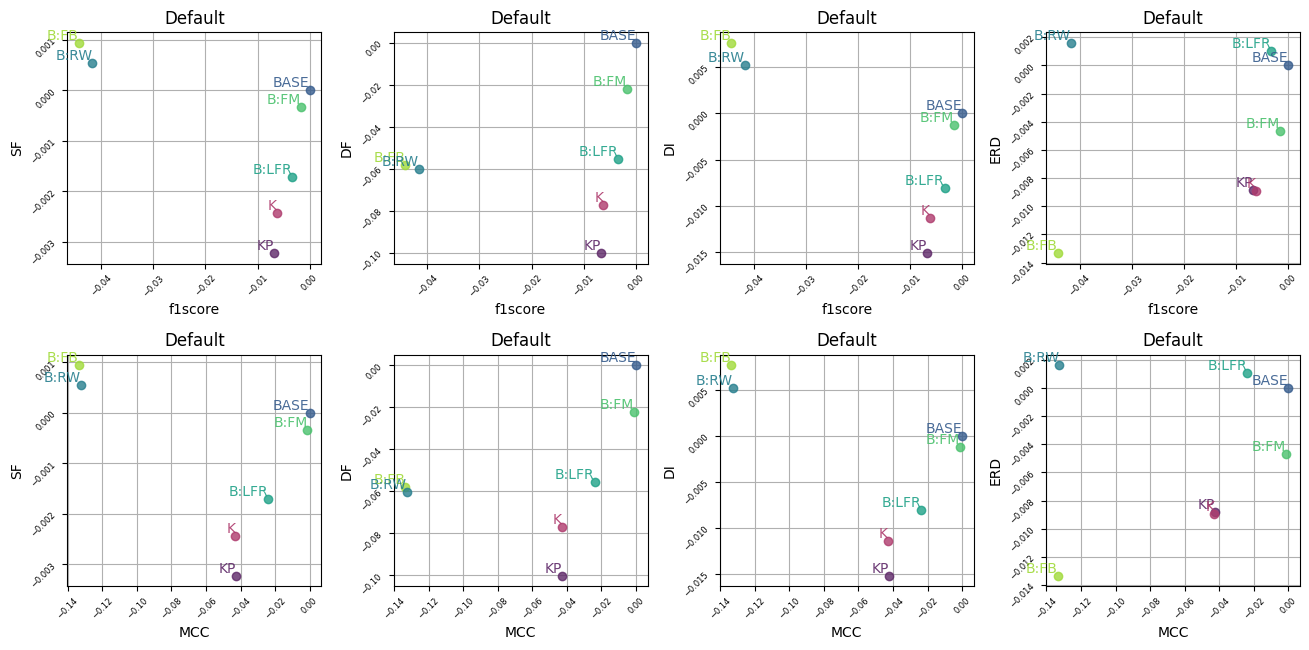

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] f1score
metrics to display: ['race|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the positive label'] f1score
metrics to display: ['race|[DI] Disparate Impact', 'race|[DI_FM] Disparate Impact the way it was implemented in FairMask'] f1score
metrics to display: ['race|[ERD] Error Rate Difference'] f1score
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] MCC
metrics to display: ['race|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was t

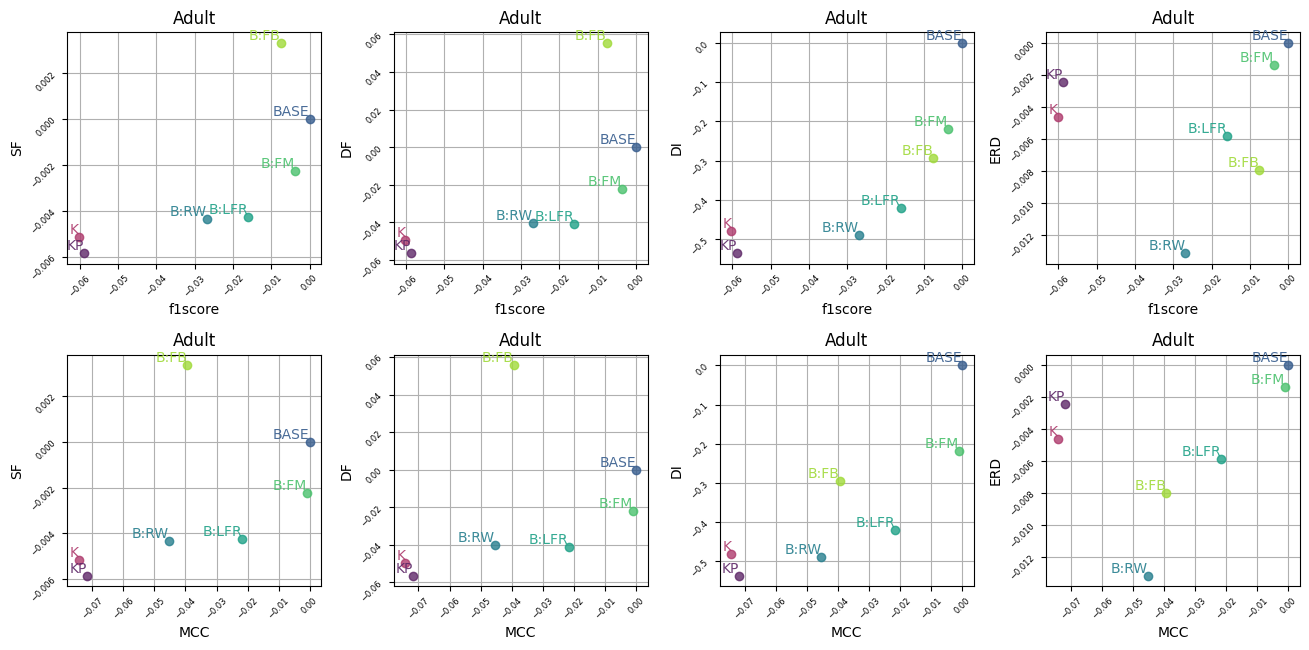

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] f1score
metrics to display: ['sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the positive label'] f1score
metrics to display: ['sex|[DI] Disparate Impact', 'sex|[DI_FM] Disparate Impact the way it was implemented in FairMask'] f1score
metrics to display: ['sex|[ERD] Error Rate Difference'] f1score
metrics to display: ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] MCC
metrics to display: ['sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the posit

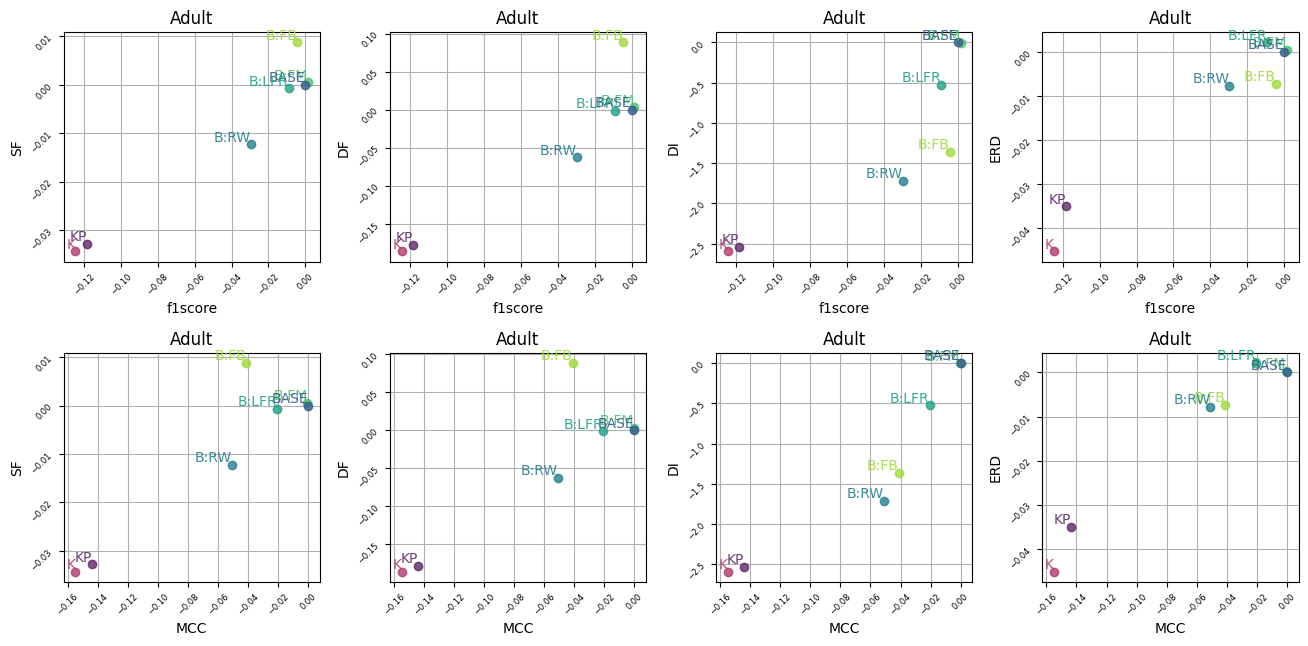

File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] f1score
metrics to display: ['race|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the positive label'] f1score
metrics to display: ['race|[DI] Disparate Impact', 'race|[DI_FM] Disparate Impact the way it was implemented in FairMask'] f1score
metrics to display: ['race|[ERD] Error Rate Difference'] f1score
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] MCC
metrics to display: ['race|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was t

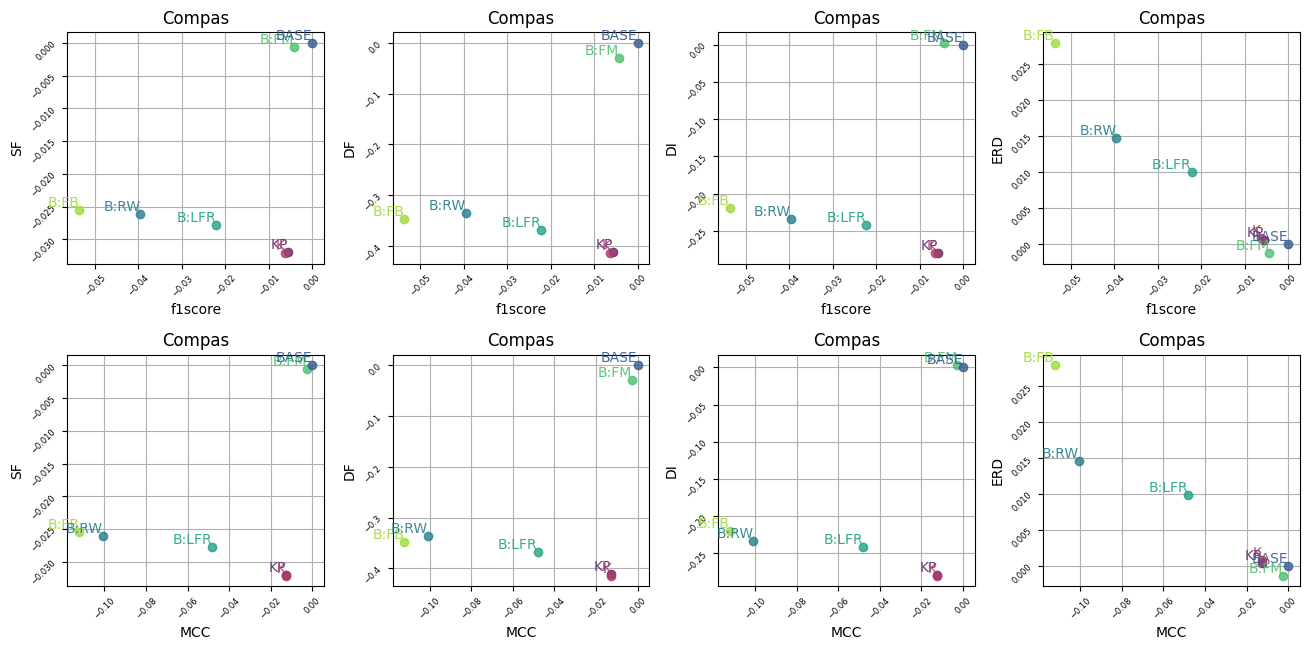

File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
metrics to display: ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] f1score
metrics to display: ['sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the positive label'] f1score
metrics to display: ['sex|[DI] Disparate Impact', 'sex|[DI_FM] Disparate Impact the way it was implemented in FairMask'] f1score
metrics to display: ['sex|[ERD] Error Rate Difference'] f1score
metrics to display: ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] MCC
metrics to display: ['sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the posit

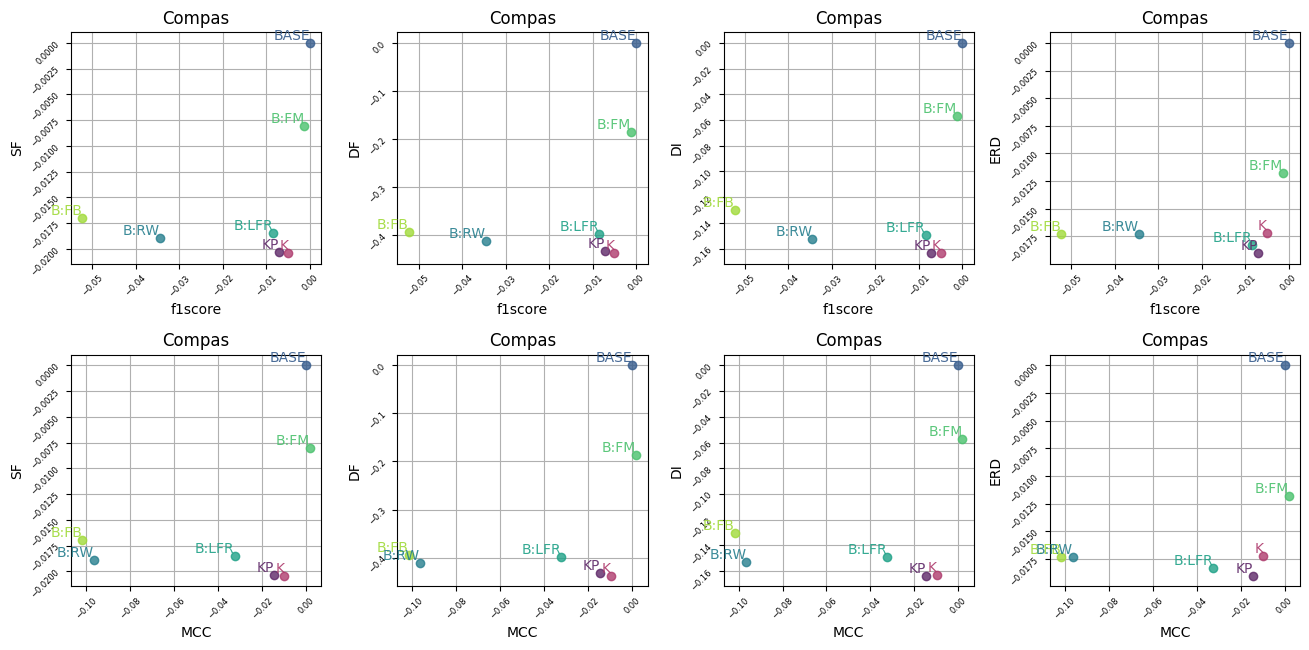

In [13]:
metrics_to_use = ["SF", "DF", "DI", "ERD"] 

for i in range(5):
    plot_multiple_metrics(f, files[i], datasets[i], metrics_to_use=metrics_to_use, size=size)
    #axes[i].set_title(titles)
        
        

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] f1score
metrics to display: ['race|[DF] Differential Fairness for One Attribute', 'sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the positive label'] f1score
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] MCC
metrics to display: ['race|[DF] Differential Fairness for One Attribute', 'sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fai

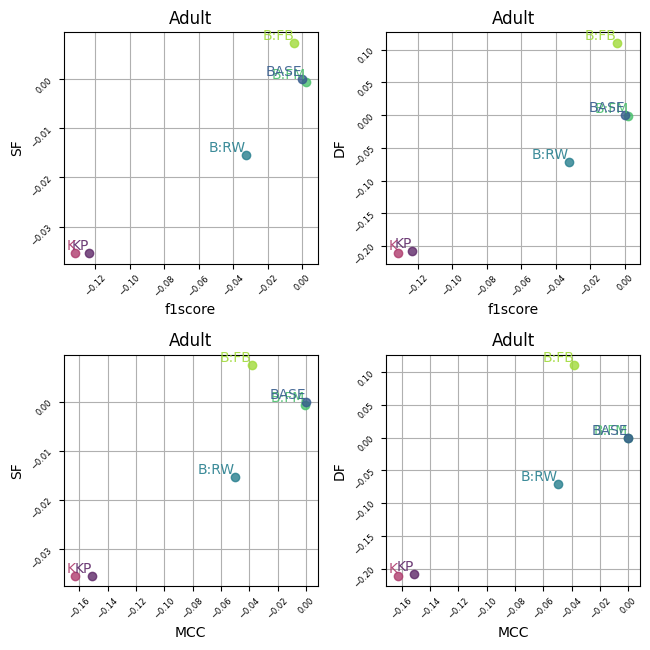

File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] f1score
metrics to display: ['race|[DF] Differential Fairness for One Attribute', 'sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fairness', '[DF] Differential Fairness if 0 was the positive label'] f1score
metrics to display: ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', 'sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness', '[SF] Statistical Parity Subgroup Fairness if 0 was the positive label'] MCC
metrics to display: ['race|[DF] Differential Fairness for One Attribute', 'sex|[DF] Differential Fairness for One Attribute', '[DF] Differential Fai

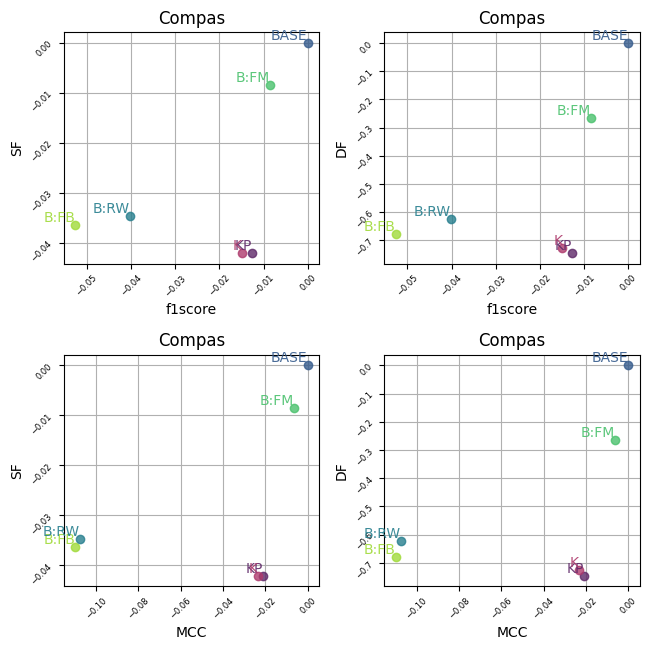

In [14]:
metrics_to_use = ["SF", "DF"] 

for i in range(2):
    plot_multiple_metrics(f, multi_files[i], multi_datasets[i], metrics_to_use=metrics_to_use, size=size)
    axes[i].set_title(multi_titles)
        